# Multiple Linear Regresssion
# Bike Sharing Assignment

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1.Which variables are significant in predicting the demand for shared bikes.

2.How well those variables describe the bike demand

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal:


We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



# Step 1: Reading and Understanding the Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from math import sqrt

In [4]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Visualising the Data

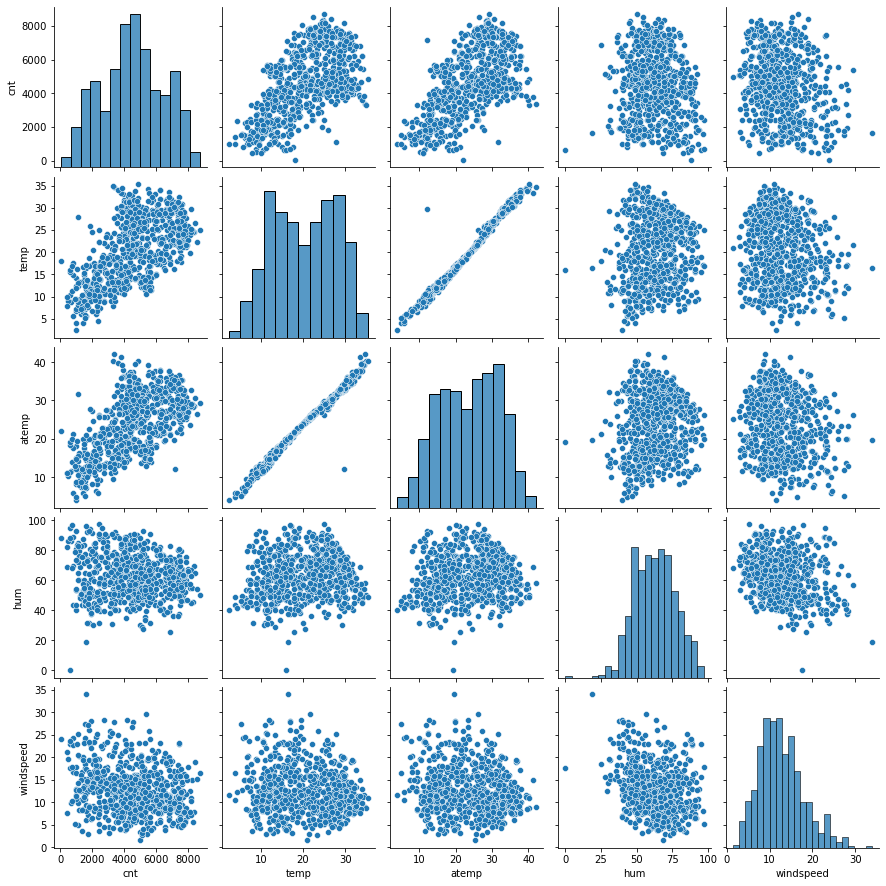

In [8]:
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

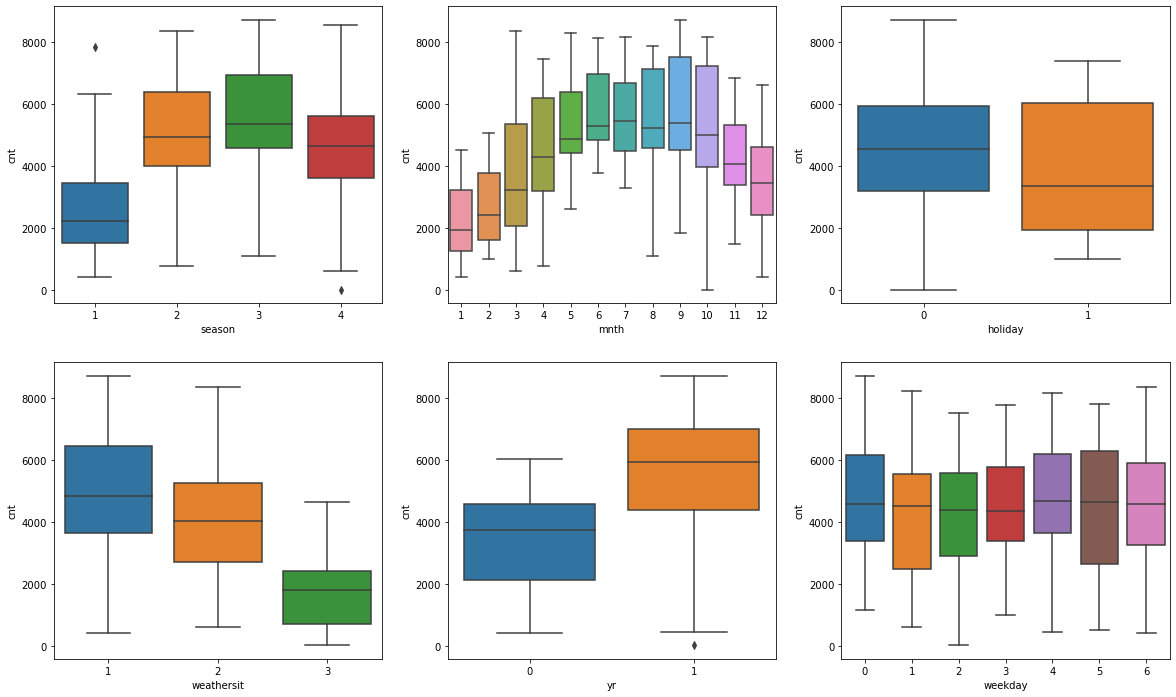

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

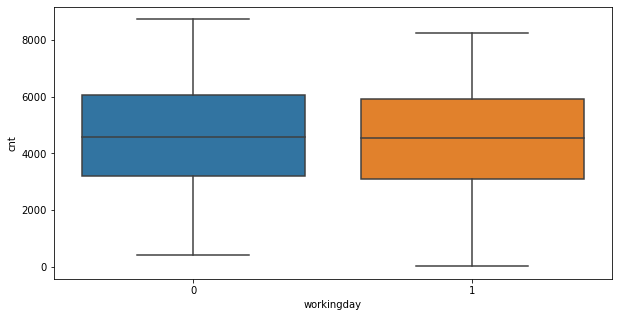

In [8]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

# Step 3: Data Preparation

In [9]:
bike.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
import calendar
bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])

In [11]:
bike.season = bike.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [12]:
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [13]:
bike.weekday = bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [14]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Dummy Variables

In [15]:
dummy = bike[['season','mnth','weekday','weathersit']]

In [16]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [18]:
bike = pd.concat([dummy,bike],axis = 1)

In [20]:
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
bike.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [22]:
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
bike.shape

(730, 30)

# Step 4: Splitting the Data into Training and Testing Sets

In [75]:
train, test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
train.shape

(510, 30)

In [26]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,20.102429,23.493909,63.112926,12.831318,4486.382353
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,7.431169,8.090038,14.156632,5.291832,1952.158739
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000


In [27]:
test.shape

(219, 30)

In [28]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.639269,20.815737,24.255828,61.961883,12.600130,4546.981735
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.481313,7.689600,8.299641,14.456669,4.984858,1898.633630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000


# Step 5 :Rescaling the Features

In [29]:
scaler = MinMaxScaler()

In [30]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [31]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [32]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


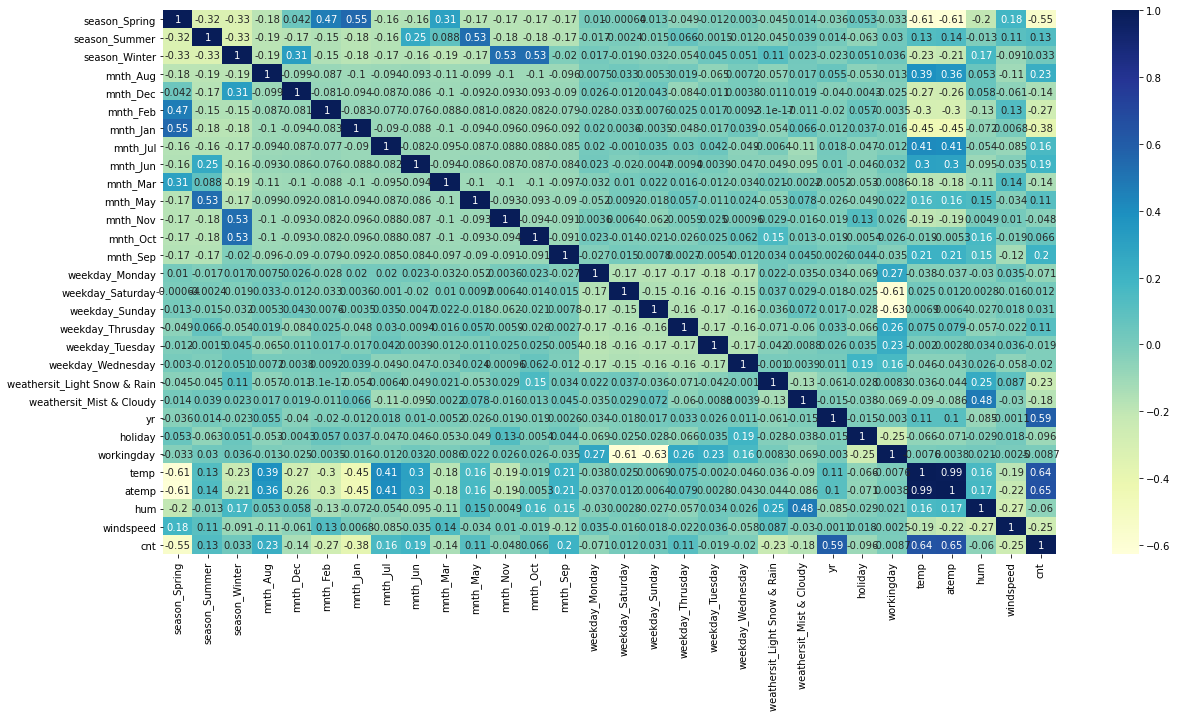

In [33]:
plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step 6: Building a linear model

In [34]:
y_train = train.pop('cnt')
X_train = train

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', False, 6),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 15),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1)]

# Starting with all the columns selected by RFE
# Model 1

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

In [39]:
X_train_rfe = X_train[col]

In [40]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [42]:
lm.params

const                           0.295720
season_Spring                  -0.051791
season_Summer                   0.049088
season_Winter                   0.093078
mnth_Jan                       -0.033102
mnth_Jul                       -0.055924
mnth_Sep                        0.082481
weathersit_Light Snow & Rain   -0.240539
weathersit_Mist & Cloudy       -0.054123
yr                              0.230076
holiday                        -0.096813
temp                            0.512685
hum                            -0.166542
windspeed                      -0.187088
dtype: float64

In [45]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.45e-190
Time:                        08:05:00   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Model 2

In [73]:
X_train_new = X_train_rfe.drop(["mnth_Jul"], axis = 1)

In [49]:
X_train_lm = sm.add_constant(X_train_new)

In [50]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.95e-189
Time:                        08:14:07   Log-Likelihood:                 506.53
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2839      0.035      8.110      0.000       0.215       0.353
season_Spring                   -0.0393      0.021     -1.898      0.058      -0.080       0.001
season_Summer                    0.0653      0.014      4.588      0.000       0.037       0.093
season_Winter                    0.1056      0.017      6.163      0.000       0.072       0.139
mnth_Jan                        -0.0356      0.018     -2.010      0.045      -0.070      -0.001
mnth_Sep                         0.0973      0.016      6.038      0.000       0.066       0.129
weathersit_Light Snow & Rain    -0.2436      0.027     -9.179      0.000      -0.296      -0.191
weathersit_Mist & Cloudy        -0.0537      0.011     -5.080      0.000      -0.075      -0.033
yr                               0.2309      0.008     28.232      0.000       0.215       0.247
holiday                         -0.0956      0.026     -3.717      0.000      -0.146      -0.045
temp                             0.4956      0.035     14.297      0.000       0.428       0.564
hum                             -0.1591      0.038     -4.187      0.000      -0.234      -0.084
windspeed                       -0.1863      0.026     -7.152      0.000      -0.237      -0.135
==============================================================================
Omnibus:                       65.945   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.928
Skew:                          -0.695   Prob(JB):                     2.78e-33
Kurtosis:                       5.264   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking VIF for multicollinearity

In [52]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,75.83
1,season_Spring,4.89
10,temp,3.79
3,season_Winter,3.40
2,season_Summer,2.32
11,hum,1.90
4,mnth_Jan,1.56
7,weathersit_Mist & Cloudy,1.56
6,weathersit_Light Snow & Rain,1.24
12,windspeed,1.21


In [53]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [54]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,29.04
9,temp,15.36
11,windspeed,4.65
0,season_Spring,4.23
2,season_Winter,3.23
1,season_Summer,2.46
6,weathersit_Mist & Cloudy,2.28
7,yr,2.08
3,mnth_Jan,1.66
4,mnth_Sep,1.28


# Model 3 (final model)

In [55]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [56]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()  

In [57]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.01e-186
Time:                        08:15:41   Log-Likelihood:                 497.69
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     498   BIC:                            -920.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [58]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,windspeed,4.61
9,temp,3.85
0,season_Spring,2.63
7,yr,2.07
1,season_Summer,1.90
2,season_Winter,1.64
3,mnth_Jan,1.60
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.23
5,weathersit_Light Snow & Rain,1.08


# Step 7: Residual Analysis of the train data

In [59]:
y_train_cnt = lm.predict(X_train_lm)


Text(0.5, 0, 'Errors')

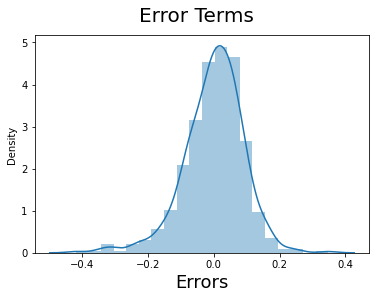

In [60]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18) 

# Step 8: Making Predictions Using the Final Model

In [76]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [62]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [63]:
y_test = test.pop('cnt')
X_test = test

In [64]:
X_test = sm.add_constant(X_test)

In [65]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jan                      219 non-null    uint8  
 5   mnth_Sep                      219 non-null    uint8  
 6   weathersit_Light Snow & Rain  219 non-null    uint8  
 7   weathersit_Mist & Cloudy      219 non-null    uint8  
 8   yr                            219 non-null    int64  
 9   holiday                       219 non-null    int64  
 10  temp                          219 non-null    float64
 11  windspeed                     219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [66]:
y_pred = lm.predict(X_test)

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8006650513071072

In [68]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.00946757448076421

# Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

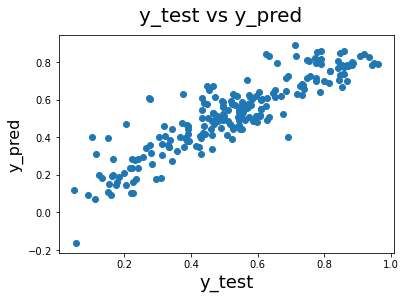

In [77]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [72]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.458863
8,yr,0.234793
0,const,0.208003
5,mnth_Sep,0.089975
3,season_Winter,0.089124
2,season_Summer,0.057206
4,mnth_Jan,-0.040091
1,season_Spring,-0.049758
7,weathersit_Mist & Cloudy,-0.079241
